In [1]:
metafile="J2145-0750_C.meta"

import ppalign as ppa
import numpy as np




In [2]:
outfile = "J2145-0750chnavgport.port"
ppa.align_archives(metafile=metafile, initial_guess="300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=1, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T.

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T.

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
     

In [3]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from J2145-0750chnavgport.port on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



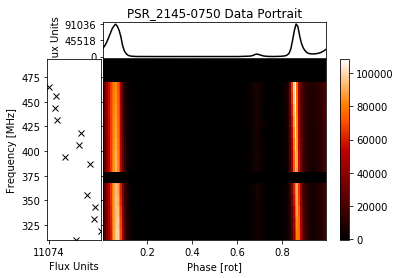

In [4]:
dp.show_data_portrait()

In [5]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=25.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 13 measurements...
B-spline interpolation model J2145-0750chnavgport.port.spl uses 2 basis profile components and 2 breakpoints (6 B-splines with k=5).


/home/jroy/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:296: RuntimeWarning: The spline is weighted least-squares polynomial of degree k.
fp gives the upper bound fp0 for the smoothing factor s	k=5 n=12 m=13 fp=21899.662294 s=432436.925502
  (k, len(t), m, fp, s)))


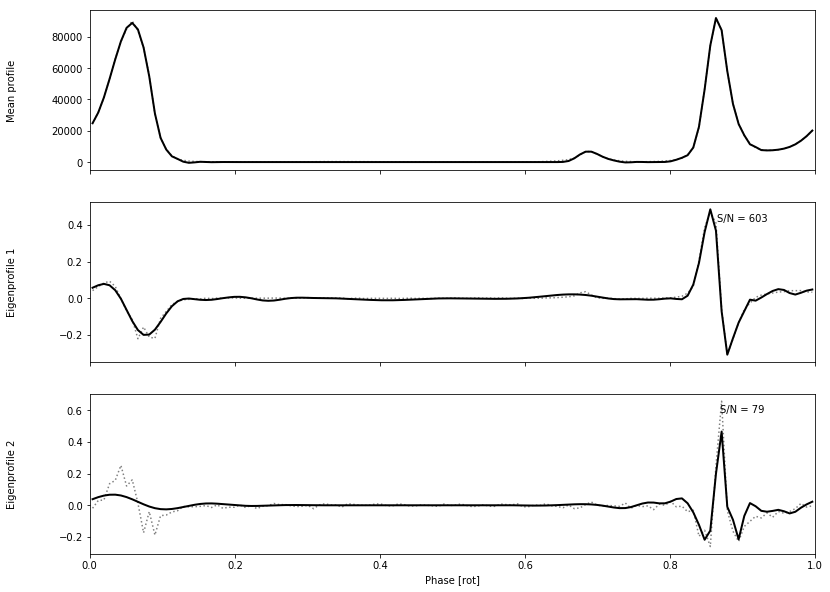

In [6]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


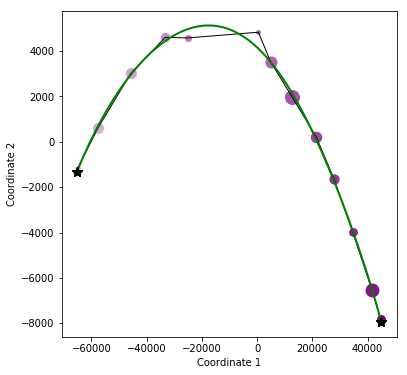

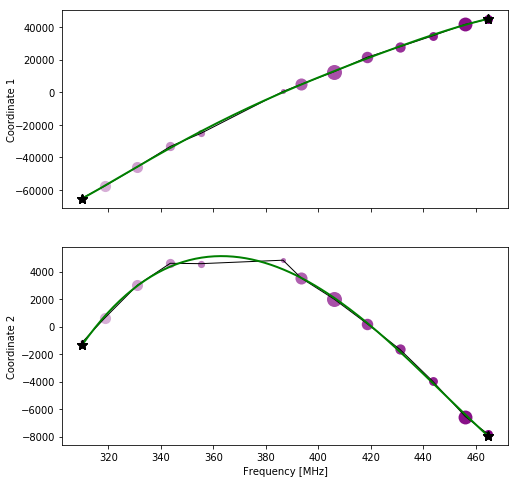

In [7]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [8]:
J2145_fit_modelfile = "J2145-0750_splinefit.spl"
dp.write_model(J2145_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J2145-0750_splinefit.spl.



Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T
~0.0101 sec/TOA
Med. TOA error is 1.009 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.055
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
  

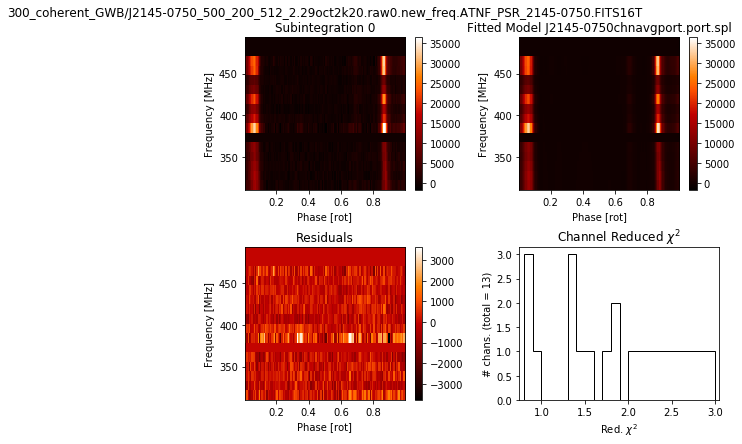


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T
~0.0079 sec/TOA
Med. TOA error is 0.297 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
  

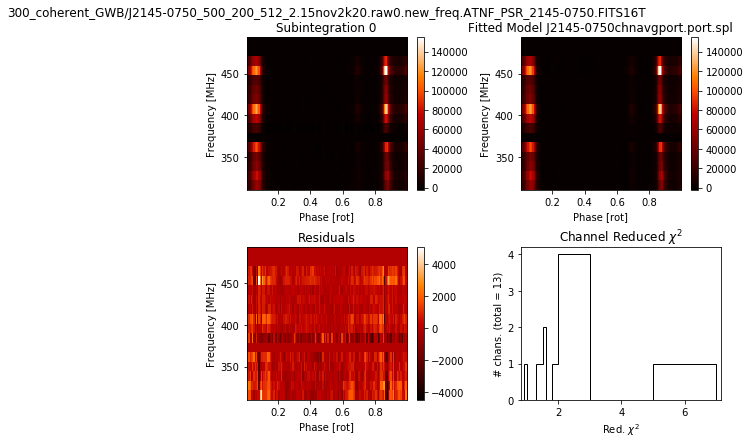


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1198.82 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T
~0.0193 sec/TOA
Med. TOA error is 0.333 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
  

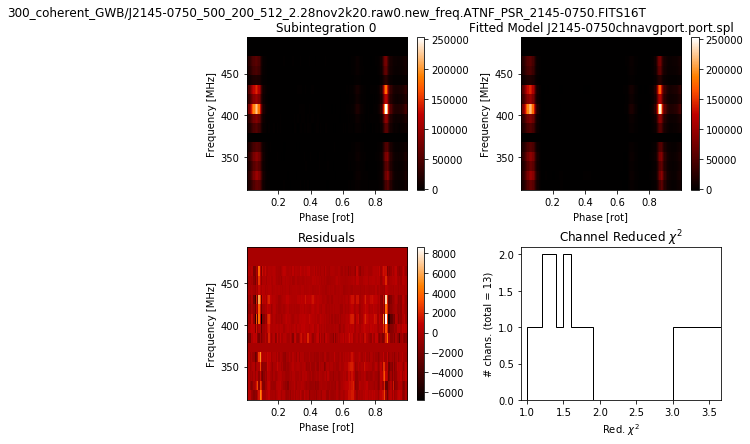


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0226 sec/TOA
Med. TOA error is 0.360 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28dec2k20.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
     

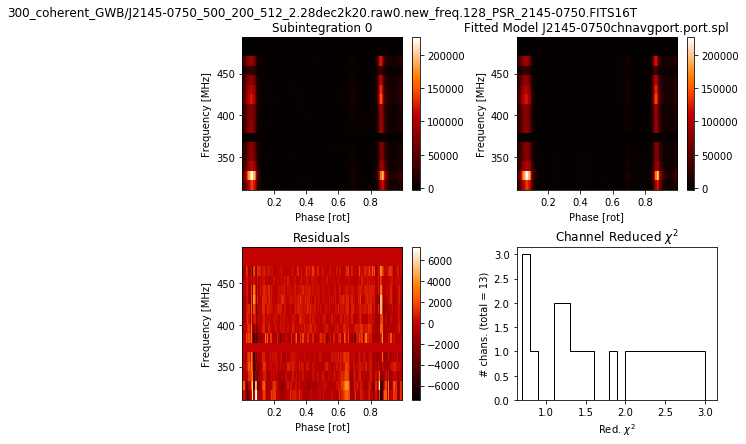


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0078 sec/TOA
Med. TOA error is 0.357 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.1feb2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        

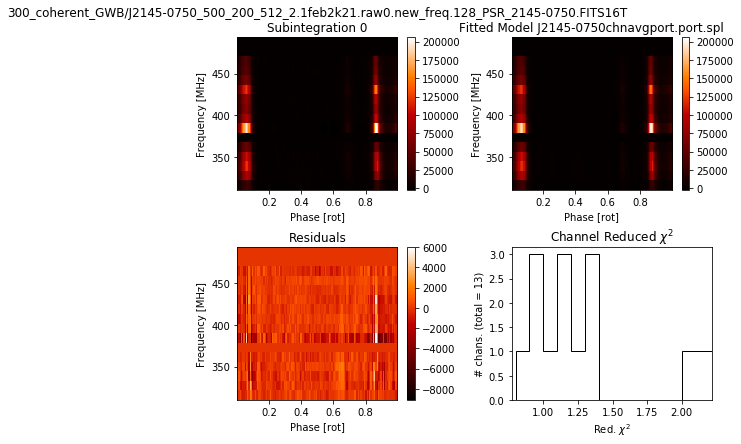


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.050
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0080 sec/TOA
Med. TOA error is 0.332 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.13mar2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.050
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
     

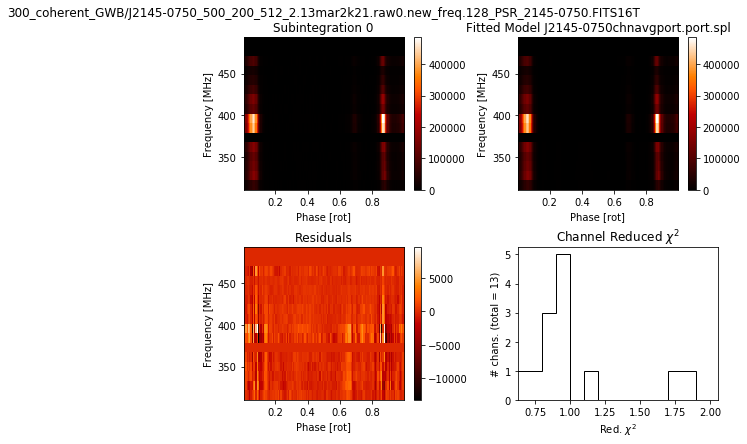


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0080 sec/TOA
Med. TOA error is 0.342 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.11may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
     

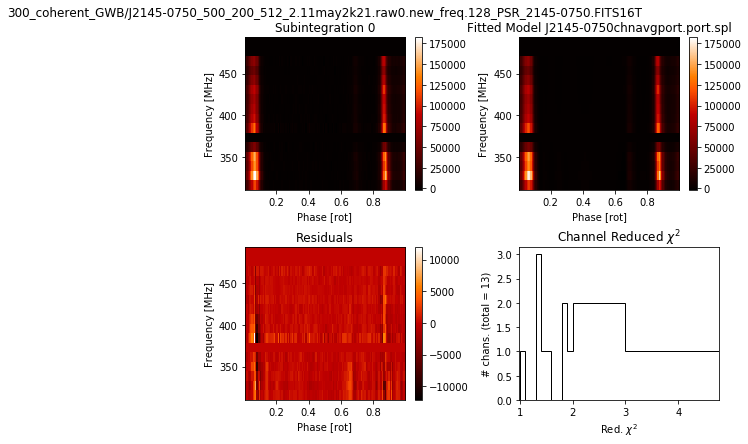


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0079 sec/TOA
Med. TOA error is 0.371 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
     

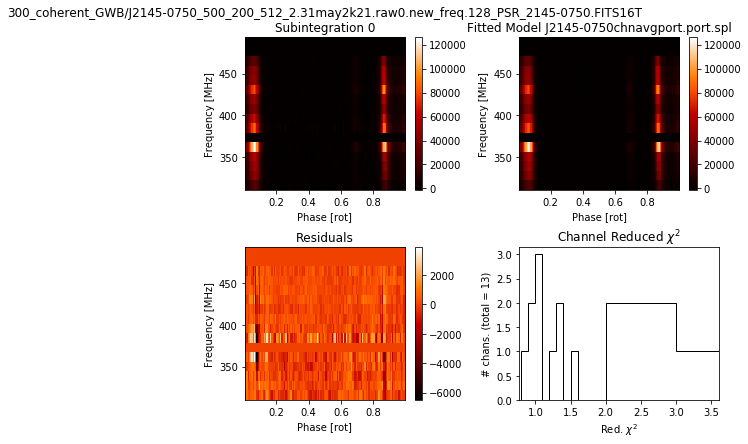


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1797.49 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0097 sec/TOA
Med. TOA error is 0.311 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
     

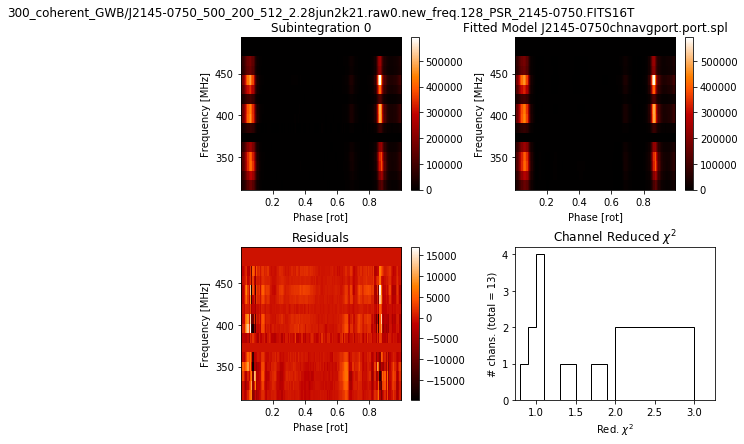


Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T
~0.0085 sec/TOA
Med. TOA error is 0.305 us

Reading data from 300_coherent_GWB/J2145-0750_500_200_512_2.3aug2k21.raw0.new_freq.128_PSR_2145-0750.FITS16T on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 399.8047
        

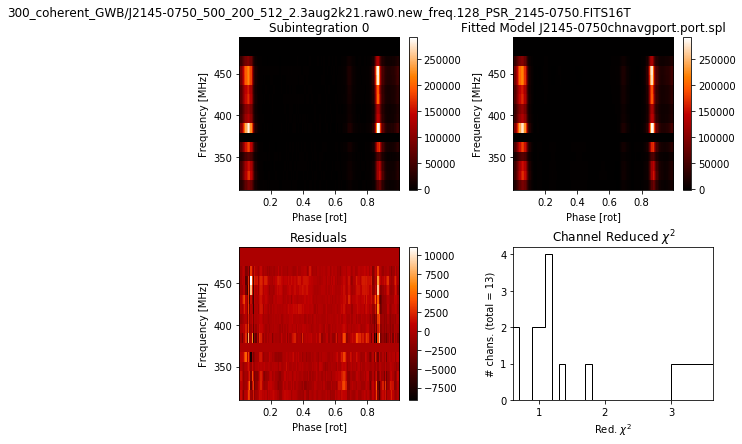

--------------------------
Total time: 0.25 sec, ~0.0255 sec/TOA


In [9]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J2145-0750_C.meta"
gt = ppt.GetTOAs(toaprogmeta, J2145_fit_modelfile)
gt.get_TOAs(bary=True,show_plot=True)


In [10]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "11OctSep2k21_WB_C_J2145-0750_2eigenvector.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)

# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [12]:
fil = open('11OctSep2k21_WB_C_J2145-0750_2eigenvector.tim', 'r')
for line in fil:
    print(line)

300_coherent_GWB/J2145-0750_500_200_512_2.29oct2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T 406.27793693 59151.637313789975387   1.009  gmrt -pp_dm 8.9968681 -pp_dme 0.0001605 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.272 -snr 397.267 -fratio 1.499 -subint 0 -nch 16 -bw 154.688 -chbw 12.500 -fe  -nbin 128 -tmplt J2145-0750_splinefit.spl

300_coherent_GWB/J2145-0750_500_200_512_2.15nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T 387.78883006 59168.568013985550971   0.297  gmrt -pp_dm 8.9979628 -pp_dme 0.0000389 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.912 -snr 1407.000 -fratio 1.499 -subint 0 -nch 16 -bw 154.688 -chbw 12.500 -fe  -nbin 128 -tmplt J2145-0750_splinefit.spl

300_coherent_GWB/J2145-0750_500_200_512_2.28nov2k20.raw0.new_freq.ATNF_PSR_2145-0750.FITS16T 380.73680883 59181.526132510045289   0.333  gmrt -pp_dm 8.9983646 -pp_dme 0.0000417 -be  -nchx 13 -tobs 1198.817 -f _ -gof 1.484 -snr 1232.051 -fratio 1.499 -subint 0 -nch 16 -bw 154.688 -chbw 12.500 -fe  -nbin 128 -tmplt J214